<a href="https://colab.research.google.com/github/Gideon-Weasley/Machine_Learning/blob/main/Linear_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regresiion without using neural networks

# Closed form


In [2]:
import numpy as np
import pandas as pd

In [3]:
#loading the dataset
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


https://www.kaggle.com/datasets/bumba5341/advertisingcsv?resource=download

In [24]:
#loading the data into pandas
df=pd.read_csv('Advertising.csv')
df.head()  #by deafault 5

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [25]:
X= df[['TV']]  # Only using the TV data
Y=df[['Sales']]

X = df['TV']  # single column (Series)

X = df[['TV']]  # single column (DataFrame)

X = df[['TV', 'Radio']]  # multiple columns


Closed form equation
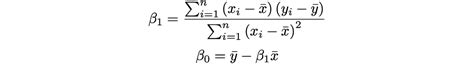

In [26]:
#Converting to numpy array
X=X.values.flatten()
Y=Y.values.flatten()
#flattening needed as the numpy arrays are basically mulid imensional arrea with 1 column

In [27]:
x=0
y=0
xy=0
x2=0
n=len(X)

#computing values for closed form equation
for i in range(n):
  x+=X[i]
  y+=Y[i]
  xy+=X[i]*Y[i]
  x2+=X[i]*X[i]

  #finding weight and bias
w=(n*xy-(x*y))/(n*x2 -(x*x))
b=y/n - w*(x/n)

In [28]:
def Linear(x_in):
  y_pred = w*x_in +b
  return y_pred

In [32]:
#predicting values
x=float(input('Enter the TV value'))
y_pred=Linear(x)
print('Predicted Sales value is',y_pred)

Enter the TV value180.8
Predicted Sales value is 15.627218139417664


The prediction will be a little off as the dataset is small and contins variance - the data points are scattered

# Normal equation
    multiple features, matrix utilization

Normal equation
θ = (Xᵀ X)⁻¹ Xᵀ y

theta is the parameter matrix

In [20]:
#we will be using the same dataset
df1=pd.read_csv('Advertising.csv')
Y=df1[['Sales']].values.reshape(-1,1)
# Drop the 'Sales' column to create X
X = df1.drop(['Sales','Unnamed: 0'], axis=1)

ones=np.ones((X.shape[0],1))  # creating an array on one
X_b=np.hstack([ones,X])

# Normal Equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

# Display coefficients
print("Intercept (bias):", theta[0][0])
print("Coefficients:", theta[1:].flatten())

Intercept (bias): 2.938889369459404
Coefficients: [ 0.04576465  0.18853002 -0.00103749]


In [22]:
# Make a prediction
x_new = np.array([1, 180.8, 10.8, 58.4])  # Example input with bias
y_pred = x_new.dot(theta) # Returns an array with one element
print("Predicted Sales:", y_pred[0])

print("Predicted Sales for input [TV=180.3, Radio=10, Newspaper=20]:", y_pred[0])

Predicted Sales: 13.188671856831315
Predicted Sales for input [TV=180.3, Radio=10, Newspaper=20]: 13.188671856831315
